In [20]:
# Exercise 10 - Neural Network Representational Capacity

import torch
import torchsummary

# quando se usa "from" ..."import" é uma forma de carregar apenas o summary dentro da biblioteca do torchinfo.

# Helper function

# weight initialization

def initWeights(m):
# (m) é o parametro que será utilizado dentro da função initWeights()
    """Initialize weights of neural network with xavier initialization."""
# É uma forma de associar uma string ao comando, se usarmos o comando help(initWeights), retornará essa frase.
# help(initWeights) # estava verificando a resposta.
    if (
            type(m) == torch.nn.Linear
            or type(m) == torch.nn.Conv2d
            or type(m) == torch.nn.Conv3d
# Conv2d, vendo se é uma camada convolucional 2D, uma camada convolucional é importante para a rede neural CNNs
    ):
        torch.nn.init.uniform_(m.weight, a=-10, b=10)
# torch.nn.init.uniform_(w.weight, a=-10,b=10 ) é o comando que dentro de m, cria valores aleatórios para os pesos, da forma que seguirão uma distribuição uniforme cujo intervalo será de -10 até 10
        torch.nn.init.uniform_(m.bias, a=-1, b=1)
# torch.nn.init.uniform_(w.weight, a=-1,b=1 ) é o comando que dentro de m, cria valores aleatórios para as bias, da forma que seguirão uma distribuição uniforme cujo intervalo será de -1 até 1

# neural network definition

class NN(torch.nn.Module):
# criação da rede neural.
    def __init__(
            self,
            inputDimension,
            hiddenDimensions,
            outputDimension,
            activationFunction=torch.nn.Tanh(),
    ):
        super().__init__()
# o comando super(). faz com que consiga rodar __int__() de outra Neural Network
        modules = []
# = [] é uma forma de iniciar uma lista vazia
        modules.append(torch.nn.Linear(inputDimension, hiddenDimensions[0]))
        modules.append(activationFunction)
# .append é uma forma de anexar no final, neste caso está anexando informações dentro do modules que antes era uma lista vazia
        for i in range(len(hiddenDimensions) - 1):
# Loop
            modules.append(
                torch.nn.Linear(hiddenDimensions[i], hiddenDimensions[i + 1])
            )
            modules.append(activationFunction)
        modules.append(torch.nn.Linear(hiddenDimensions[-1], outputDimension))

        self.model = torch.nn.Sequential(*modules)
# torch.nn.Sequencial(*modules) é uma forma de organizar as sequencias ordenadas, seu input vem com * pois é necessário desempacotar as informações
    def forward(self, x):
        u = self.model(x)
        return u

# Neural network definition & sampling

# model definition
numberOfHiddenNeurons = 100
# numberOfHiddenNeurons = 150
# numberOfLayers = 10
numberOfLayers = 15

hiddenDimensions = [numberOfHiddenNeurons] * numberOfLayers
# É uma forma de falar quantas camadas serao e quantos neurônios em cada uma
activationFunction = torch.nn.Sigmoid()
model = NN(2, hiddenDimensions, 1, activationFunction)
# É a forma de escrever a Rede Neural NN, o input possui 2 dimensões e saída será unidimensional
model.apply(initWeights)
# é uma função que permite aplicar uma função específica que encontra entre parênteses.

# summarize the neural network and show number of trainable parameters
# the tuple is the input shape

torchsummary.summary(model, (1, 2))
# é uma forma de mostrar a quantidade de paramentos treinaveis, (1,2) neste caso é o tamanho do input que seria avaliado.

# grid definition

Nx = 1000
Ny = 500

x = torch.linspace(-1, 1, Nx)
y = torch.linspace(-0.5, 0.5, Ny)
x, y = torch.meshgrid(x, y, indexing="ij")
input = torch.cat((x.reshape(-1, 1), y.reshape(-1, 1)), 1)
# torch.cat() junta os vetores, como todos possuem uma coluna, o input gerado terá 2 colunas. uma de x e a outra de y.
# .reshape(-1,1) transforma os vetores em vetores coluna.
with torch.no_grad():
# É uma forma de não precisar calcular os gradientes.
    output = model(input).detach().reshape((Nx, Ny))
# Quando usamos .detach(), criamos um vetor que não levará em conta os gradientes calculados anteriormente.


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]             300
           Sigmoid-2               [-1, 1, 100]               0
            Linear-3               [-1, 1, 100]          10,100
           Sigmoid-4               [-1, 1, 100]               0
            Linear-5               [-1, 1, 100]          10,100
           Sigmoid-6               [-1, 1, 100]               0
            Linear-7               [-1, 1, 100]          10,100
           Sigmoid-8               [-1, 1, 100]               0
            Linear-9               [-1, 1, 100]          10,100
          Sigmoid-10               [-1, 1, 100]               0
           Linear-11               [-1, 1, 100]          10,100
          Sigmoid-12               [-1, 1, 100]               0
           Linear-13               [-1, 1, 100]          10,100
          Sigmoid-14               [-1,

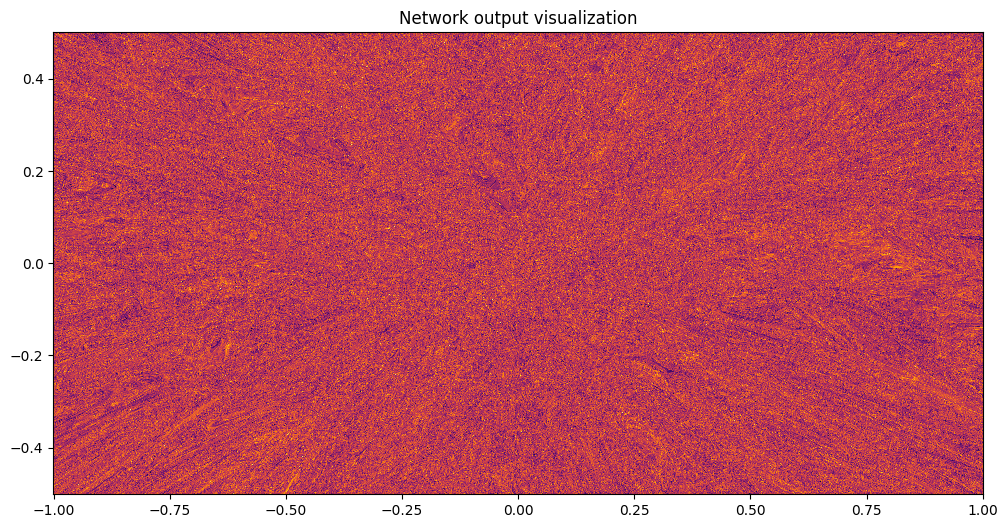

In [22]:
# Output Visualization

# INTERACTIVE_PLOT = True
INTERACTIVE_PLOT = False

if not INTERACTIVE_PLOT:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12, 6))
    cp = ax.pcolormesh(
        x, y, output, cmap=plt.cm.inferno, shading='auto'
        # x, y, output, cmap=plt.cm.plasma, shading='auto'
        # x, y, output, cmap=plt.cm.coolwarm, shading='auto' # Acrescentei mais esse comando por curiosidade
    )  # colormap inferno or plasma look great
    plt.title('Network output visualization')
    plt.show()

else:               # interactive
    # These lines (and likely a kernel restart) should make an interactive plot.
    # Depends on platform/install details
    import matplotlib
    matplotlib.use('qtagg')
    # %matplotlib widget
    import matplotlib.pyplot as plt

    class ZoomPlot():

        def __init__(self):
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(111)
            self.xmin = -2.
            self.xmax = 2.
            self.ymin = -2.
            self.ymax = 2.
            self.xpress = self.xmin
            self.xrelease = self.xmax
            self.ypress = self.ymin
            self.yrelease = self.ymax
            self.resolution = 400
            self.maxiters = 30

            self.fig.canvas.mpl_connect('button_press_event', self.onpress)
            self.fig.canvas.mpl_connect('button_release_event', self.onrelease)
            self.plot_fixed_resolution(self.xmin, self.xmax,
                                    self.ymin, self.ymax)

        def plot_fixed_resolution(self, x1, x2, y1, y2):
            x = torch.linspace(x1, x2, self.resolution)
            y = torch.linspace(y1, y2, self.resolution)

            x, y = torch.meshgrid(x, y, indexing="ij")
            input = torch.cat((x.reshape(-1, 1), y.reshape(-1, 1)), 1)
            with torch.no_grad():
                output = model(input).detach().reshape((self.resolution, self.resolution))

            self.ax.clear()
            self.ax.set_xlim(x1, x2)
            self.ax.set_ylim(y1, y2)
            self.ax.pcolormesh(
                x, y, output, cmap=plt.cm.inferno, shading='auto')  # colormap inferno or plasma look great
            plt.title('Interactive plot, click and drag cursor')
            plt.show()
            self.fig.canvas.draw()

        def onpress(self, event):
            if event.button != 1: return
            self.xpress = event.xdata
            self.ypress = event.ydata

        def onrelease(self, event):
            if event.button != 1: return
            self.xrelease = event.xdata
            self.yrelease = event.ydata
            self.xmin = min(self.xpress, self.xrelease)
            self.xmax = max(self.xpress, self.xrelease)
            self.ymin = min(self.ypress, self.yrelease)
            self.ymax = max(self.ypress, self.yrelease)
            self.plot_fixed_resolution(self.xmin, self.xmax,
                                    self.ymin, self.ymax)


    plot = ZoomPlot()